<a href="https://colab.research.google.com/github/edilmita/edilmita/blob/main/Edi_F_Classification_with_K_Nearest_Neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 10747 to 18714
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          2000 non-null   int64
 1   LIMIT_BAL                   2000 non-null   int64
 2   SEX                         2000 non-null   int64
 3   EDUCATION                   2000 non-null   int64
 4   MARRIAGE                    2000 non-null   int64
 5   AGE                         2000 non-null   int64
 6   PAY_0                       2000 non-null   int64
 7   PAY_2                       2000 non-null   int64
 8   PAY_3                       2000 non-null   int64
 9   PAY_4                       2000 non-null   int64
 10  PAY_5                       2000 non-null   int64
 11  PAY_6                       2000 non-null   int64
 12  BILL_AMT1                   2000 non-null   int64
 13  BILL_AMT2                   2000 non-null   int64
 14  BIL

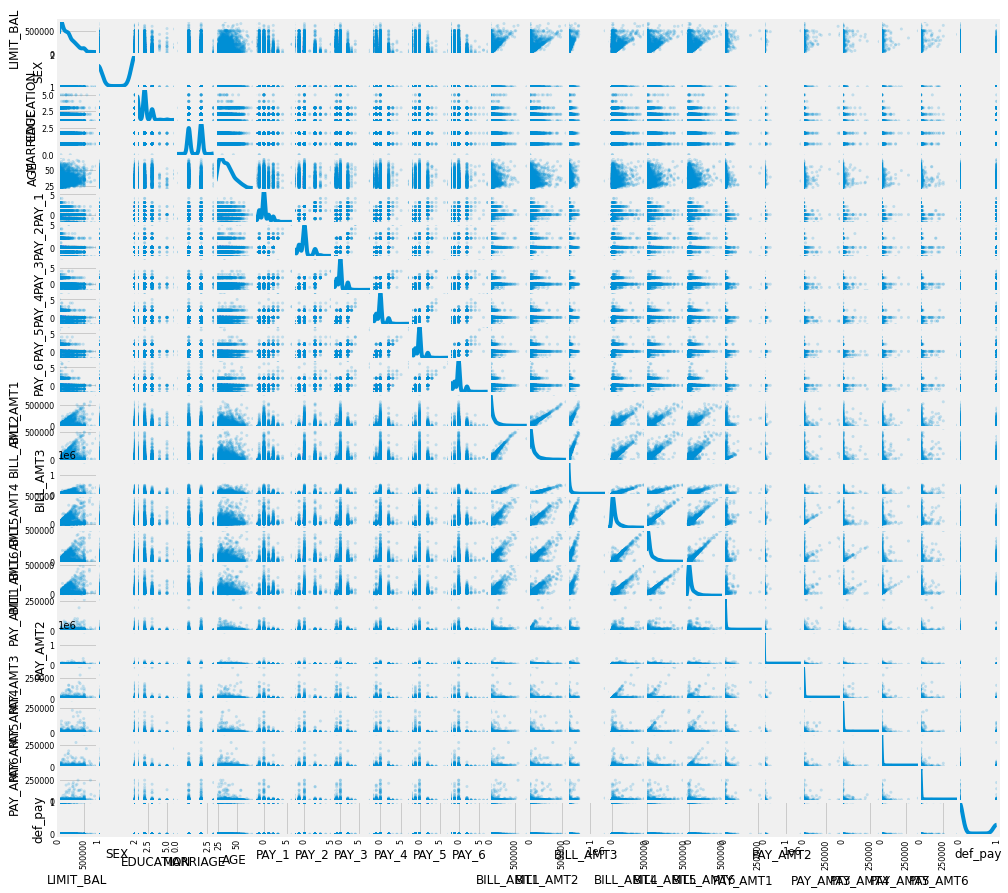

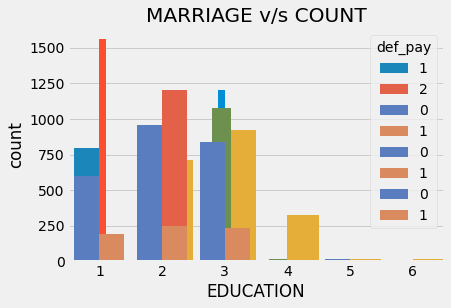

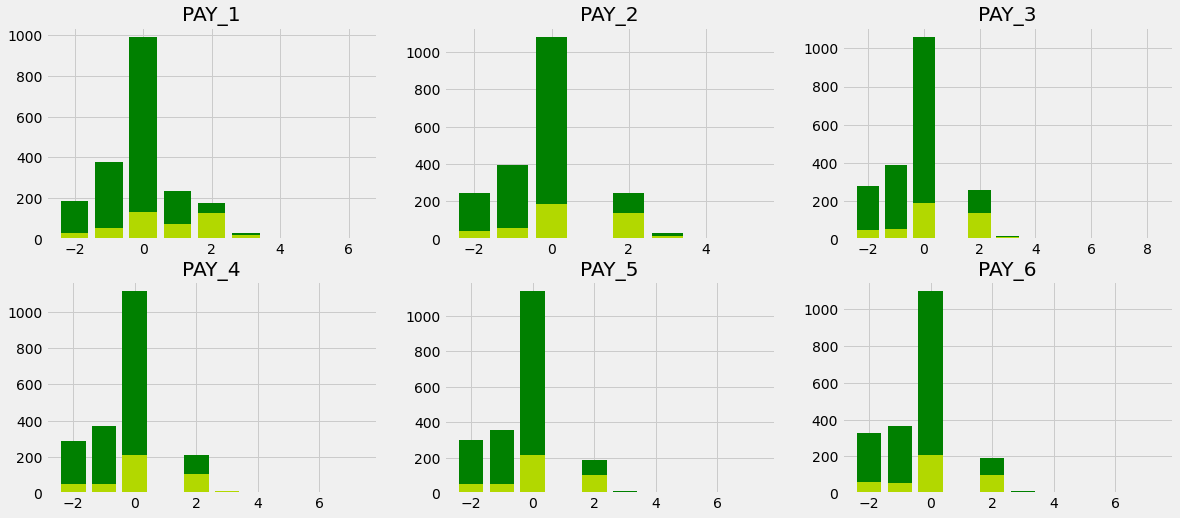

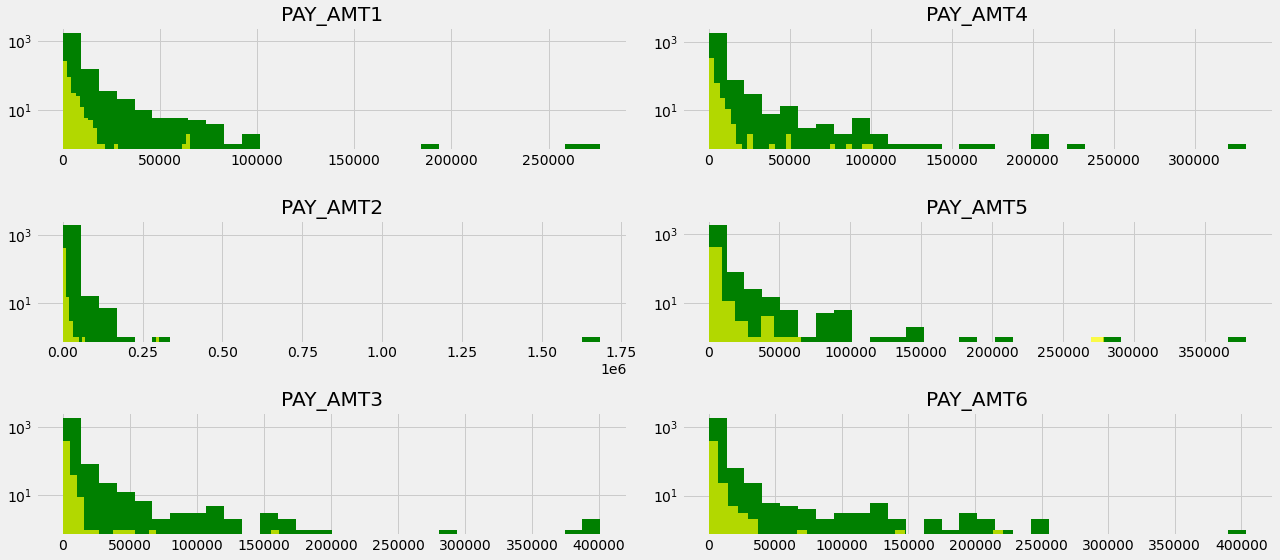

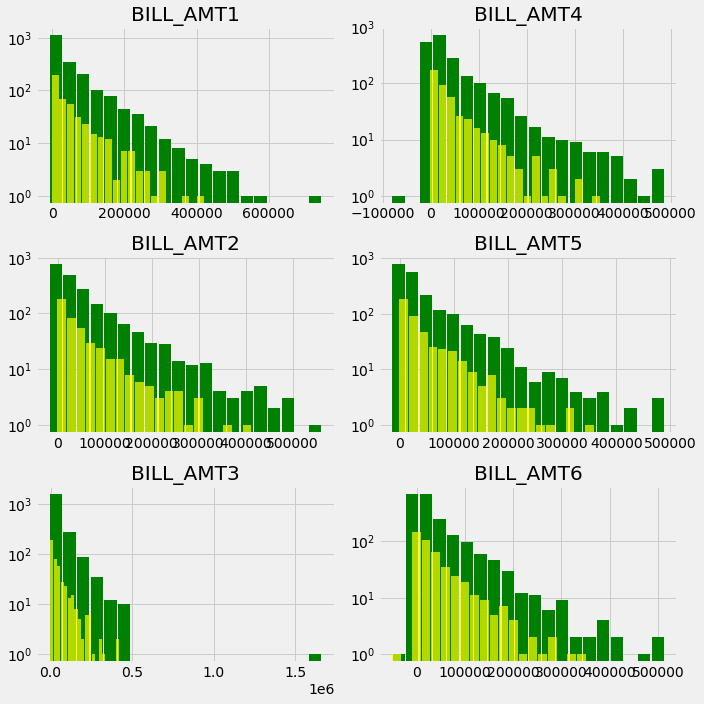

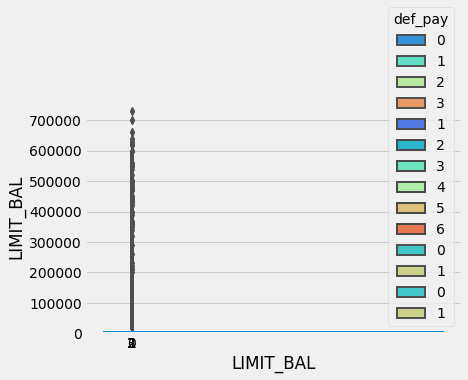

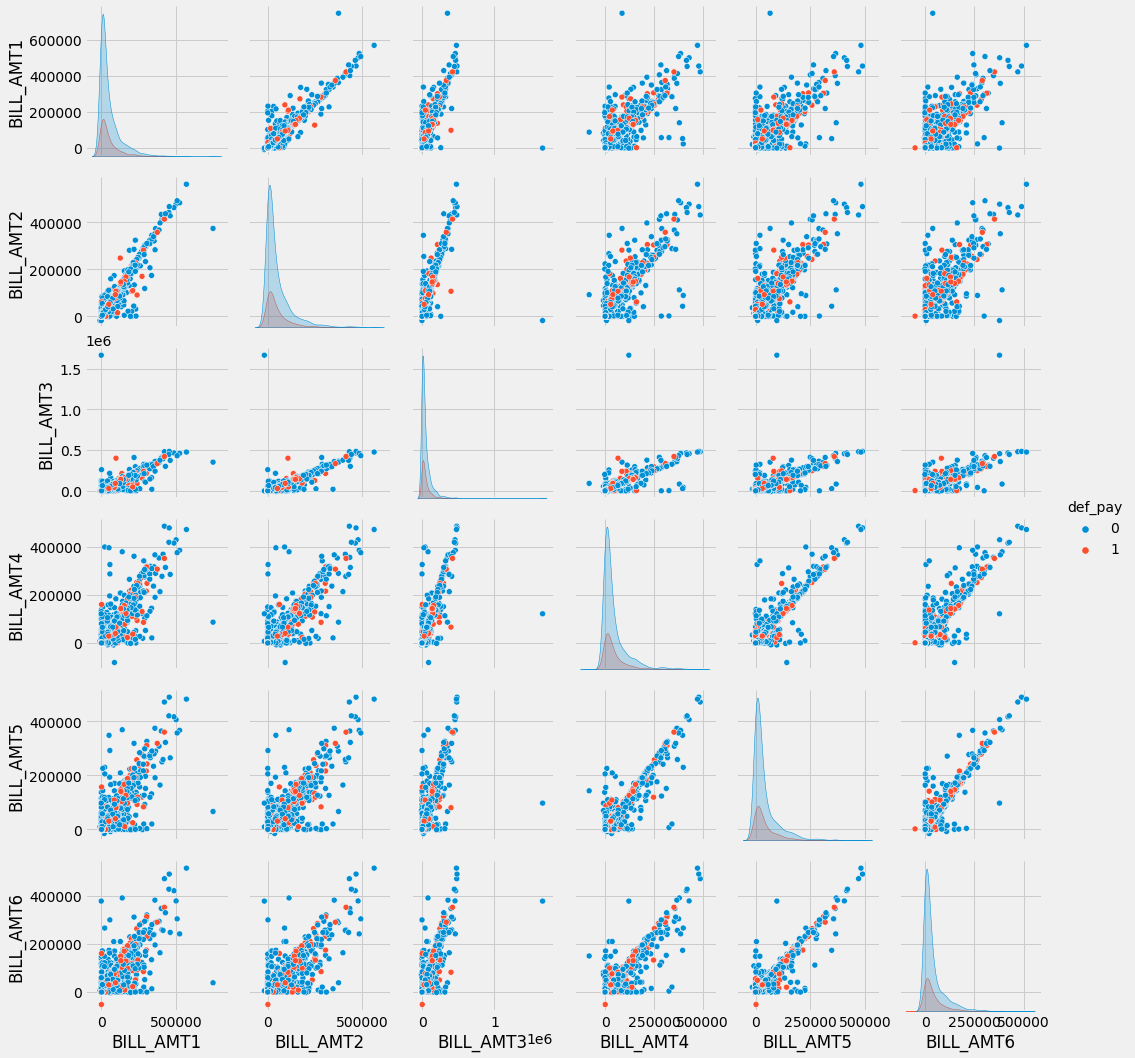

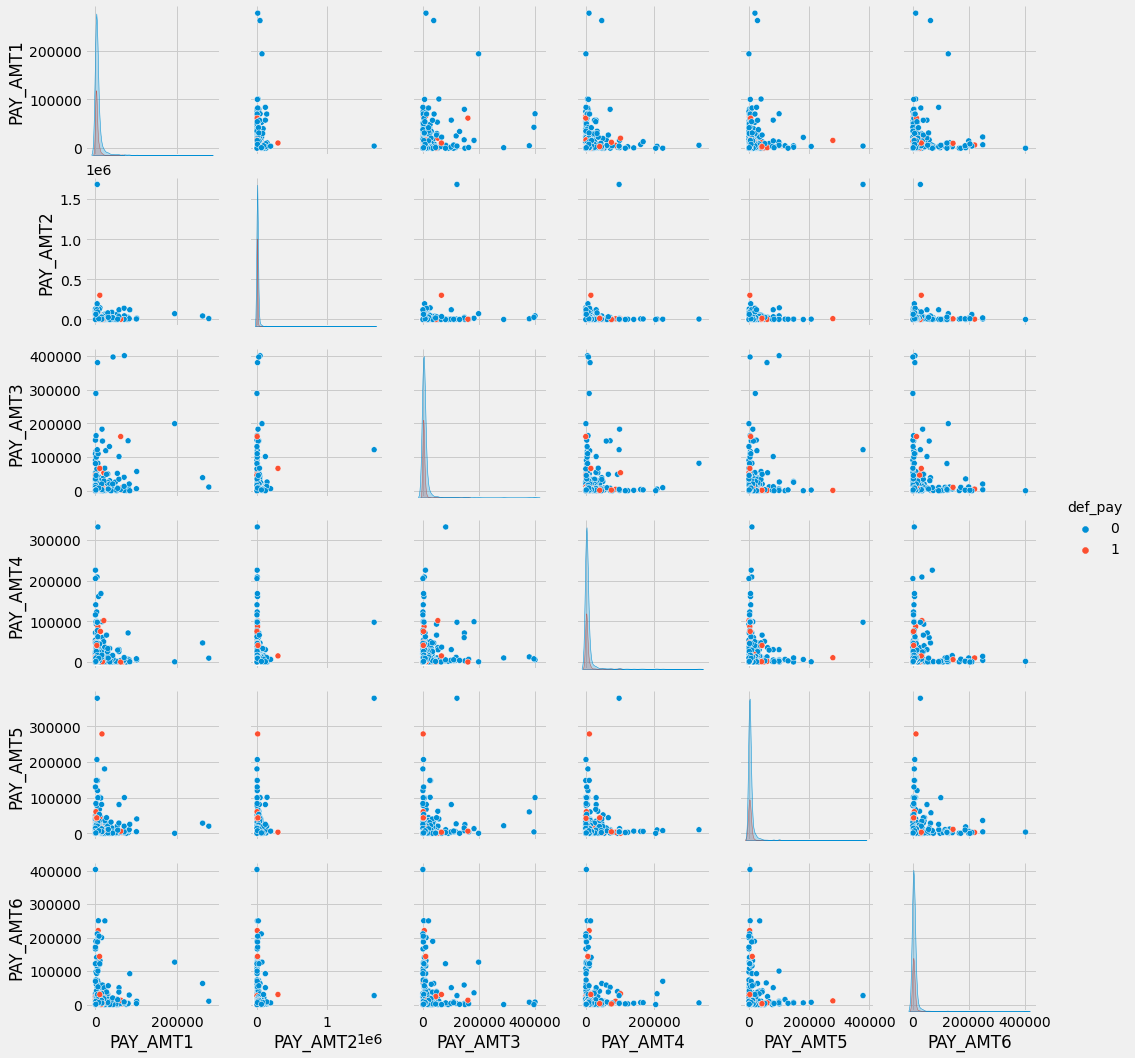

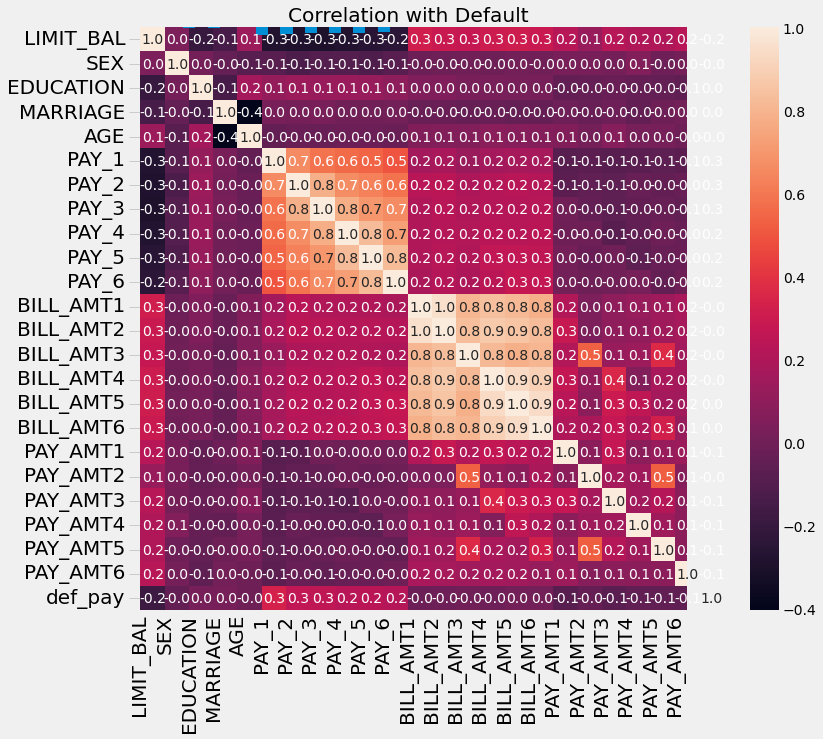

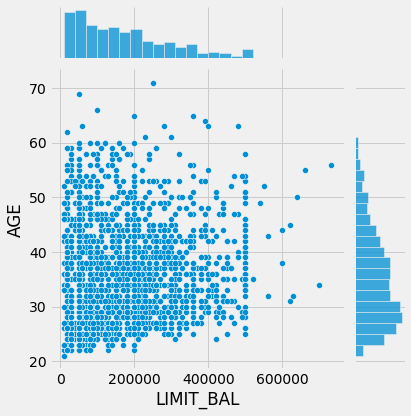

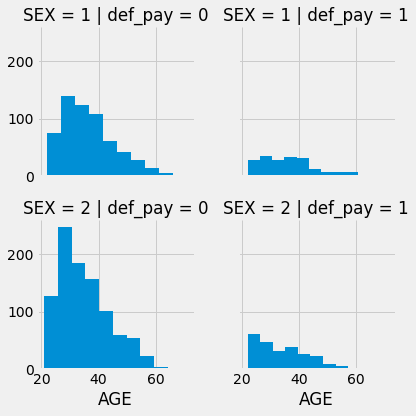

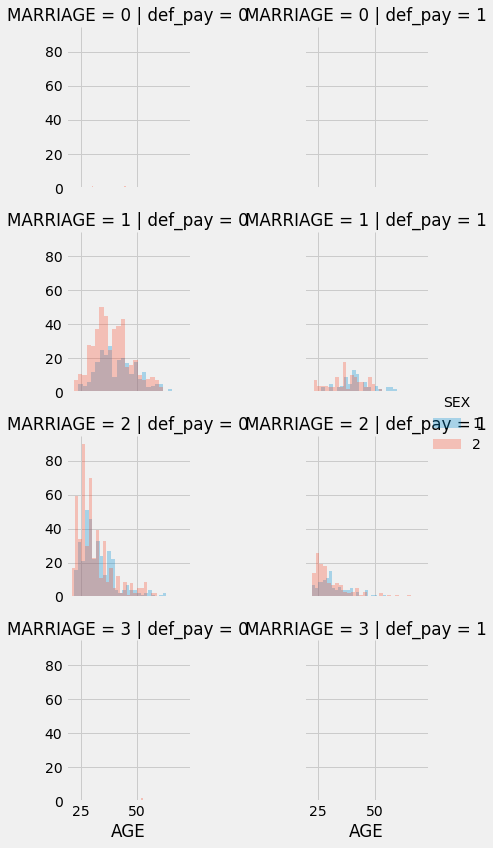

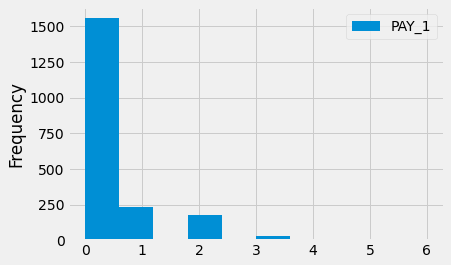

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,K-Nearest Neighbour,0.8075,0.642857,0.211765,0.318584,0.590009


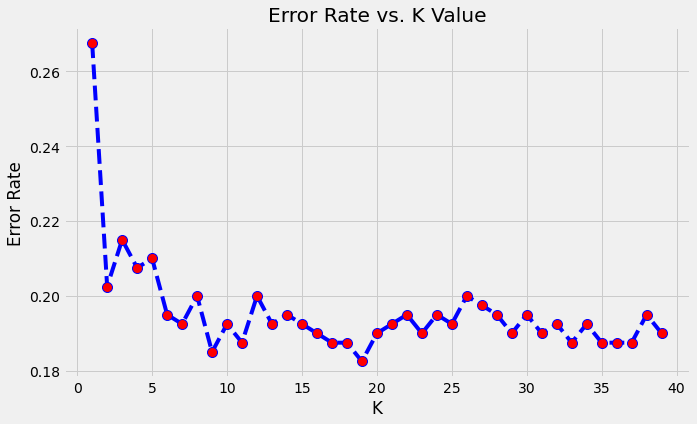

In [45]:
#######################
# Importing Libraries #
#######################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

#############################################
# Importing the Credit Card Default mydata #
#############################################

mydata = pd.read_csv('/content/credit_defaults.csv')
mydata = mydata.sample(n=2000,replace =False,random_state=1)
mydata.head(5)

#ID	    LIMIT_BAL	    SEX	EDUCATION	MARRIAGE	AGE	PAY_0	PAY_2	PAY_3	PAY_4	...	BILL_AMT4	BILL_AMT5	BILL_AMT6	PAY_AMT1	PAY_AMT2	PAY_AMT3	PAY_AMT4	PAY_AMT5	PAY_AMT6	default_payment_next_month
#10747	10748	310000	1	  3	1	32	0	0	0	0	...	84373	57779	14163	8295	6000	4000	3000	1000	2000	0
#12573	12574	10000	  2	  3	1	49	-1	-1	-2	-1	...	1690	1138	930	0	0	2828	0	182	0	1
#29676	29677	50000	  1	  2	1	28	-1	-1	-1	0	...	45975	1300	43987	0	46257	2200	1300	43987	1386	
#8856	  8857	80000	  2	  3	1	52	2	2	3	3	...	40748	39816	40607	3700	1600	1600	0	1600	1600	1
#21098	21099	270000	1	  1	2	34	1	2	0	0	...	22448	15490	17343	0	4000	2000	0	2000	2000	0
#5 rows × 25 columns

#displays the last five rows of the data frame by default. 
##########################################################

mydata.tail()

#1 to 5 of 5 entries

#index	ID	LIMIT_BAL	SEX	EDUCATION	MARRIAGE	AGE	PAY_0	PAY_2	PAY_3	PAY_4	PAY_5	PAY_6	BILL_AMT1	BILL_AMT2	BILL_AMT3	BILL_AMT4	BILL_AMT5	BILL_AMT6	PAY_AMT1	PAY_AMT2
#23295	23296	160000	2	1	2	25	-1	0	-1	-1	0	0	6087	1934	11376	2199	10856	0	1000	11426
#15148	15149	250000	1	1	1	53	-2	-2	-2	-2	-2	-2	0	0	0	0	0	0	0	0
#18666	18667	50000	2	1	2	23	-1	-1	-2	-2	-2	-2	2332	0	0	0	0	0	0	0
#3415	3416	200000	2	2	1	37	0	0	0	0	0	0	184144	189158	190569	191730	171269	151550	8017	8000
#18714	18715	420000	2	1	2	28	0	0	-1	0	0	0	7880	4623	64513	65592	57438	31029	1010	6451

mydata.info()

#<class 'pandas.core.frame.DataFrame'>
#Int64Index: 2000 entries, 10747 to 18714
#Data columns (total 25 columns):
# #   Column                      Non-Null Count  Dtype
#---  ------                      --------------  -----
# 0   ID                          2000 non-null   int64
# 1   LIMIT_BAL                   2000 non-null   int64
# 2   SEX                         2000 non-null   int64
# 3   EDUCATION                   2000 non-null   int64
# 4   MARRIAGE                    2000 non-null   int64
# 5   AGE                         2000 non-null   int64
# 6   PAY_0                       2000 non-null   int64
# 7   PAY_2                       2000 non-null   int64
# 8   PAY_3                       2000 non-null   int64
# 9   PAY_4                       2000 non-null   int64
# 10  PAY_5                       2000 non-null   int64
# 11  PAY_6                       2000 non-null   int64
# 12  BILL_AMT1                   2000 non-null   int64
# 13  BILL_AMT2                   2000 non-null   int64
# 14  BILL_AMT3                   2000 non-null   int64
# 15  BILL_AMT4                   2000 non-null   int64
# 16  BILL_AMT5                   2000 non-null   int64
# 17  BILL_AMT6                   2000 non-null   int64
# 18  PAY_AMT1                    2000 non-null   int64
# 19  PAY_AMT2                    2000 non-null   int64
# 20  PAY_AMT3                    2000 non-null   int64
# 21  PAY_AMT4                    2000 non-null   int64
# 22  PAY_AMT5                    2000 non-null   int64
# 23  PAY_AMT6                    2000 non-null   int64
# 24  default_payment_next_month  2000 non-null   int64
# dtypes: int64(25)
# memory usage: 406.2 KB

# Now we can get a descriptive statistics summary of a given dataframe
######################################################################

mydata.describe()


#ID	LIMIT_BAL	SEX	EDUCATION	MARRIAGE	AGE	PAY_0	PAY_2	PAY_3	PAY_4	...	BILL_AMT4	BILL_AMT5	BILL_AMT6	PAY_AMT1	PAY_AMT2	PAY_AMT3	PAY_AMT4	PAY_AMT5	PAY_AMT6	default_payment_next_month
#count	2000.000000	2000.000000	2000.000000	2000.000000	2000.000000	2000.000000	2000.000000	2000.000000	2000.000000	2000.000000	...	2000.000000	2000.000000	2000.000000	2000.000000	2.000000e+03	2000.000000	2000.000000	2000.000000	2000.000000	2000.000000
#mean	14950.749000	171825.000000	1.603000	1.853000	1.555000	35.458000	-0.024500	-0.138500	-0.179500	-0.213000	...	44390.095500	41502.586000	39643.917000	5153.111500	6.362411e+03	6096.214000	5091.073500	5043.292500	5738.555500	0.219500
#std	8624.251173	131598.930521	0.489398	0.798567	0.516825	9.144892	1.103861	1.163613	1.177698	1.166753	...	65827.281839	61928.132672	60472.016246	13065.162427	4.014712e+04	21880.625777	16197.840731	16448.820691	21310.318739	0.414011
#min	3.000000	10000.000000	1.000000	1.000000	0.000000	21.000000	-2.000000	-2.000000	-2.000000	-2.000000	...	-81334.000000	-15306.000000	-51443.000000	0.000000	0.000000e+00	0.000000	0.000000	0.000000	0.000000	0.000000
#25%	7404.000000	60000.000000	1.000000	1.000000	1.000000	28.000000	-1.000000	-1.000000	-1.000000	-1.000000	...	2939.500000	2158.750000	1319.250000	1000.000000	9.947500e+02	445.500000	328.250000	260.250000	166.750000	0.000000
#50%	14889.500000	140000.000000	2.000000	2.000000	2.000000	34.000000	0.000000	0.000000	0.000000	0.000000	...	19454.000000	18652.000000	17621.500000	2022.500000	2.031500e+03	1843.000000	1597.500000	1500.000000	1464.000000	0.000000
#75%	22510.250000	250000.000000	2.000000	2.000000	2.000000	41.000000	0.000000	0.000000	0.000000	0.000000	...	53394.250000	51005.500000	49484.750000	5000.000000	5.000000e+03	5000.000000	4295.500000	4207.750000	4000.000000	0.000000
#max	29993.000000	730000.000000	2.000000	6.000000	3.000000	71.000000	6.000000	5.000000	8.000000	7.000000	...	487066.000000	489200.000000	513798.000000	276698.000000	1.684259e+06	400972.000000	331788.000000	379267.000000	403500.000000	1.000000
#8 rows × 25 columns

#################################################################################################
# There are 2000 individual credit card customers.
#
# The average value for a credit card limit is 171,825. 
#
# The standard deviation is unusually large, the max value is 730,000.
#
# Education Level is mostly graduate school and university.
#
# Most of the clients are either married or single.
#
# The average age is 35.5 years, with a standard deviation of 9.2.
#
# Because the value 0 for default payment means 'not default' and value 1 means 'default', 
# the mean of 0.219 means that there are 22.1% of credit card agreements that will default 
# the following month (this will be verified in the subsequent sections of this evaluation).
##################################################################################################


#Executes Python function provided by the user on a column (columns) of DataFrame connected 
#to its input port. 
###############################################################################################

mydata.columns

#Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
#       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
#       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
#       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
#       'default_payment_next_month'],
#      dtype='object')

mydata.index = mydata['ID']
mydata.head(3)

#	ID	LIMIT_BAL	SEX	EDUCATION	MARRIAGE	AGE	PAY_0	PAY_2	PAY_3	PAY_4	.	BILL_AMT4	BILL_AMT5	BILL_AMT6	PAY_AMT1	PAY_AMT2	PAY_AMT3	PAY_AMT4	PAY_AMT5	PAY_AMT6	default_payment_next_month																					
#ID
#10748	10748	310000	1	3	1	32	0	0	0	0	...	84373	57779	14163	8295	6000	4000	3000	1000	2000	0
#12574	12574	10000	2	3	1	49	-1	-1	-2	-1	...	1690	1138	930	0	0	2828	0	182	0	1
#29677	29677	50000	1	2	1	28	-1	-1	-1	0	...	45975	1300	43987	0	46257	2200	1300	43987	1386	0
#3 rows × 25 columns

#Remove columns ID and corresponding axis
#########################################

mydata.drop('ID',axis=1,inplace=True)
mydata.head(1)

#	LIMIT_BAL	SEX	EDUCATION	MARRIAGE	AGE	PAY_0	PAY_2	PAY_3	PAY_4	PAY_5	...	BILL_AMT4	BILL_AMT5	BILL_AMT6	PAY_AMT1	PAY_AMT2	PAY_AMT3	PAY_AMT4	PAY_AMT5	PAY_AMT6	default_payment_next_month
#ID																					
#10748	310000	1	3	1	32	0	0	0	0	0	...	84373	57779	14163	8295	6000	4000	3000	1000	2000	0
#1 rows × 24 columns

mydata.columns

#Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
#       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
#       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
#       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
#       'default_payment_next_month'],
#      dtype='object')

# returns the summatory of a Data Frame object where all the values are replaced with a Boolean value True for NULL values, 
# and otherwise False.

mydata.isnull().sum()

#LIMIT_BAL                     0
#SEX                           0
#EDUCATION                     0
#MARRIAGE                      0
#AGE                           0
#PAY_0                         0
#PAY_2                         0
#PAY_3                         0
#PAY_4                         0
#PAY_5                         0
#PAY_6                         0
#BILL_AMT1                     0
#BILL_AMT2                     0
#BILL_AMT3                     0
#BILL_AMT4                     0
#BILL_AMT5                     0
#BILL_AMT6                     0
#PAY_AMT1                      0
#PAY_AMT2                      0
#PAY_AMT3                      0
#PAY_AMT4                      0
#PAY_AMT5                      0
#PAY_AMT6                      0
#default_payment_next_month    0
#dtype: int64

# We removed the rows that contains NULL values and sumariza the 
# 1 = male; 2 = female
#################################################################

mydata['SEX'].value_counts(dropna=False)

# 1 = male; 2 = female

#2    1206
#1     794
#Name: SEX, dtype: int64

# We removed the rows that contains NULL values and sumariza the 
# 1 = Yes; 2 = No
################################################################

mydata['default_payment_next_month'].value_counts(dropna=False)

# 1 = yes, 0 = no

# 0    1561
# 1     439

# We removed the rows that contains NULL values and sumariza the 
# 1 = graduate school; 2 = university; 3 = high school; 4 = others; 5=unknown, 6=unknown
########################################################################################


mydata['EDUCATION'].value_counts(dropna=False)

#1 = graduate school; 2 = university; 3 = high school; 4 = others; 5=unknown, 6=unknown

# 2    925
# 1    715
# 3    325
# 5     18
# 4     13
# 6      4
# Name: EDUCATION, dtype: int64


# renames Columns
#################

mydata = mydata.rename(columns={'default_payment_next_month': 'def_pay', 'PAY_0':'PAY_1'})

mydata.head()

#1 to 5 of 5 entries
#Filter

#ID	LIMIT_BAL	SEX	EDUCATION	MARRIAGE	AGE	PAY_1	PAY_2	PAY_3	PAY_4	PAY_5	PAY_6	BILL_AMT1	BILL_AMT2	BILL_AMT3	BILL_AMT4	BILL_AMT5	BILL_AMT6	PAY_AMT1	PAY_AMT2	PAY_AMT3
#10748	310000	1	3	1	32	0	0	0	0	0	0	172772	152397	110375	84373	57779	14163	8295	6000	4000
#12574	10000	2	3	1	49	-1	-1	-2	-1	2	2	32	-358	-748	1690	1138	930	0	0	2828
#29677	50000	1	2	1	28	-1	-1	-1	0	-1	-1	430	0	46257	45975	1300	43987	0	46257	2200
#8857	80000	2	3	1	52	2	2	3	3	3	2	36649	39448	40101	40748	39816	40607	3700	1600	1600
#21099	270000	1	1	2	34	1	2	0	0	

# Display Columns
#################

mydata.columns

# Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
#      'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
#       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
#       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'def_pay'],
#      dtype='object')

###################################
# Data Visualization and Analysis #
###################################

#KDE Plot described as Kernel Density Estimate is used for visualizing the Probability Density of a continuous 
##############################################################################################################

from pandas.plotting import scatter_matrix
scatter_matrix(mydata, alpha=0.2, figsize=(15,15), diagonal= 'kde' )
plt.show()

# Gender Plot
#############

plt.style.use('fivethirtyeight')
mydata['SEX'].hist()
plt.xlabel('Gender' '    1.0 = Male' '    2.0 = Female ' )
plt.ylabel('COUNT')
plt.title('GENDER v/s COUNT')

# The number of females is higher than Males. 

# Females    1206
# Males       794

# Default Payment Next Month Plot
#################################

plt.style.use('fivethirtyeight')
mydata['def_pay'].hist()
plt.xlabel('DEFAULT PAY NEXT MONTH''   Default = 0,  Not Default = 1')
plt.ylabel('COUNT')
plt.title('Default Credit Card Clients - target value - data unbalance\n')

#1 = yes, 0 = no

# 0    1561
# 1     439

# Education Plot
################

plt.style.use('fivethirtyeight')
mydata['EDUCATION'].hist()
plt.xlabel('EDUCATION''(  #1 = graduate school; 2 = university; 3 = high school; 4 = others; 5=unknown, 6=unknown)')
plt.ylabel('COUNT')
plt.title('EDUCATION')

#1 = graduate school; 2 = university; 3 = high school; 4 = others; 5=unknown, 6=unknown

# 2    925
# 1    715
# 3    325
# 5     18
# 4     13
# 6      4

# More number of credit holders are university students followed by Graduates and then High school students

# Marriage Plot
################

plt.style.use('fivethirtyeight')
mydata['MARRIAGE'].hist()
plt.xlabel('MARRIAGE''    1.0 = Marriage' '    2.0 = Single ' '   3.0 = others')
plt.ylabel('COUNT')
plt.title('MARRIAGE v/s COUNT')

# We have more Marrieds customers with a credit card than singles.

# Gender Matplot
################

sns.countplot(x='SEX',data=mydata,hue = 'SEX')

# Checking the number of counts of defaulters and non defaulters by Gender


# Gender Vs Default of payment
##############################

sns.countplot(x='SEX', data=mydata,hue="def_pay", palette="muted")  

# It is obvious from the above graphics that females have general fever default payments vs males.


# Married Status Vs Default of payment
######################################


g=sns.countplot(x="MARRIAGE", data=mydata,hue="def_pay", palette="muted")

#From the above plot it is clear that those people who have marital status single have less default 
#payment wrt married status people. Non-Defaults have a higher proportion of Married =2 


# Education Vs Default of payment
######################################


g=sns.countplot(x="EDUCATION", data=mydata,hue="def_pay", palette="muted")

#From the above plot is clear that those people who are university students have fewer default 
#payment vs graduates and high school people.


# Each month payments Vs Default of payment
###########################################


def getColumnsNames(prefix):
    return [prefix+str(x) for x in range(1,7)]
# PAY_1 , PAY_2 , PAY_3 , PAY_4 , PAY_5, PAY_6
pay_status_columns = getColumnsNames('PAY_')
figure, ax = plt.subplots(2,3)
figure.set_size_inches(18,8)


for i in range(len(pay_status_columns)):
    row,col = int(i/3), i%3

    d  = mydata[pay_status_columns[i]].value_counts()
    x = mydata[pay_status_columns[i]][(mydata['def_pay']==1)].value_counts()
    ax[row,col].bar(d.index, d, align='center', color='green')
    ax[row,col].bar(x.index, x, align='center', color='yellow', alpha=0.7)
    ax[row,col].set_title(pay_status_columns[i])
   
#The above figure shows a bar plot for each month’s payment status which shows the count of #defaulters and non-defaulter.


# Payment Amount Vs Default of payment
###########################################


pay_amt_columns = getColumnsNames('PAY_AMT')
figure, ax = plt.subplots(3,2)
figure.set_size_inches(18,8)


for i in range(len(pay_status_columns)):
    row,col =  i%3, int(i/3)
   
    ax[row,col].hist(mydata[pay_amt_columns[i]], 30, color ='green')
    ax[row,col].hist(mydata[pay_amt_columns[i]][(mydata['def_pay']==1)],30,color='yellow',alpha = 0.7)
    ax[row,col].set_title(pay_amt_columns[i])
    #adding scaling to make the graph more helpful
    ax[row,col].set_yscale('log', nonposy='clip')
plt.tight_layout()
plt.show()

# The above histogram shows the distribution of payment amount for each month explicitly for # #defaulters and non-defaulters.


# Billing Amount Vs Default of payment
###########################################

bill_atm_columns =  getColumnsNames('BILL_AMT')
figure, ax = plt.subplots(3,2)
figure.set_size_inches(10,10)


for i in range(len(pay_status_columns)):
    row,col =  i%3, int(i/3)
   
    ax[row,col].hist(mydata[bill_atm_columns[i]], 20,rwidth=0.9, color ='green')
    ax[row,col].hist(mydata[bill_atm_columns[i]][(mydata['def_pay']==1)],20,rwidth=0.9,color='yellow',alpha = 0.7)
    ax[row,col].set_title(bill_atm_columns[i])
    #adding scaling to make the graph more helpful
    ax[row,col].set_yscale('log', nonposy='clip')
plt.tight_layout()
plt.show()

#The directly above histogram reveals the allocation of the bill amount created for each calendar 
#month explicitly for defaulters and non-defaulters.



# Age Vs Default of payment
######################################

sns.boxplot(x='def_pay',y='AGE',data=mydata,palette='rainbow')

#<matplotlib.axes._subplots.AxesSubplot at 0x7f312791a0d0>


# Default of payment Vs Status of Married Vs Age
#################################################

sns.boxplot(x='def_pay',hue='MARRIAGE', y='AGE',data=mydata,palette="rainbow")
#<matplotlib.axes._subplots.AxesSubplot at 0x7f312786f810>


# Default of payment Vs Education Vs Age
####################################################


sns.boxplot(x='def_pay',hue='EDUCATION', y='AGE',data=mydata,palette="rainbow" )
#<matplotlib.axes._subplots.AxesSubplot at 0x7f31279460d0>



# Default of payment Vs Education Vs Limit Balance
##################################################

sns.boxplot(x='EDUCATION',hue='def_pay', y='LIMIT_BAL',data=mydata,palette="rainbow")
#<matplotlib.axes._subplots.AxesSubplot at 0x1a2e3eb898>




# Default of payment Vs Mariage Vs Limit Balance
##################################################

sns.boxplot(x='MARRIAGE',hue='def_pay', y='LIMIT_BAL',data=mydata,palette="rainbow")
#<matplotlib.axes._subplots.AxesSubplot at 0x7f31285b5190>




#The distplot represents the univariate distribution of data i.e. data distribution of a variable against the density distribution. 
###################################################################################################################################

sns.distplot(mydata['LIMIT_BAL'],kde=True,bins=30)

# <matplotlib.axes._subplots.AxesSubplot at 0x7f3128e55c50>




# plot columns with similar names to check the correlation
################################################################

sns.pairplot(mydata, vars=mydata.columns[11:17], kind='scatter',hue= 'def_pay')
sns.pairplot(mydata, vars=mydata.columns[17:23],hue = 'def_pay')

#<seaborn.axisgrid.PairGrid at 0x7f312ab2cfd0>


#######################################################
#Observing Correlation between features of the mydata#
#######################################################


correlation = mydata.corr()
plt.subplots(figsize=(30,10))
sns.heatmap( correlation, square=True, annot=True, fmt=".1f" ) 

#<matplotlib.axes._subplots.AxesSubplot at 0x7f312f733910>

#Consequently, it seems like the PAY_0, and PAY_X variables are the toughest predictors of #default, 
#observed by the LIMIT_BAL and PAY_AMT_X variables.


#Corelation with Default
##########################


X = mydata.drop(['def_pay'],axis=1)
X.corrwith(mydata['def_pay']).plot.bar(figsize = (20, 10), title = "Correlation with Default", fontsize = 20,rot = 90, grid = True)

#<matplotlib.axes._subplots.AxesSubplot at 0x7f312e077cd0>

#It appears from the over chart is that most negatively correlated feature is LIMIT_BAL but we 
#cannot carelessly eliminate this feature because corresponding it is especially critical aspect for 
#prediction.


#Joinplot for limit balance Vs Age
##################################

#Draw a plot of two variables with bivariate and univariate graphs.


sns.jointplot(x='LIMIT_BAL',y='AGE',data=mydata,kind="scatter")
#<seaborn.axisgrid.JointGrid at 0x7fbd36833d50>


#Facet Grid
############

g = sns.FacetGrid(mydata, col = 'def_pay', row = 'SEX')
g.map(plt.hist, 'AGE')

#<seaborn.axisgrid.FacetGrid at 0x7fbd30729910>



#Facet Grid of default of Payment  Vs Married and Gender
########################################################

g = sns.FacetGrid(mydata, col='def_pay', row= "MARRIAGE", hue='SEX')
g.map(plt.hist, 'AGE', alpha=0.3, bins=25) 
g.add_legend()

#<seaborn.axisgrid.FacetGrid at 0x7fbd311ec310>

#If we look at the default profile from marriage status, most default customers are married (and 
#they were given a  higher limit balance too).



#################
# Data Cleaning #
#################


#EDUCATION has 6 and groups 5 and 6 are unlabeled, also the category 0 is undocumented.

#MARRIAGE has a label 0 that is undocumented


#Data Transformation

#The 0 in MARRIAGE can be safely categorized as 'Other' (thus 3).

#The 0 (undocumented), 5, and 6 (label unknown) in EDUCATION can also be put in an 'Other' #category (thus 4)

fil = (mydata.EDUCATION == 5) | (mydata.EDUCATION == 6) | (mydata.EDUCATION == 0)
mydata.loc[fil, 'EDUCATION'] = 4
mydata.EDUCATION.value_counts()

#2    925
#1    715
#3    325
#4     35
#Name: EDUCATION, dtype: int64

mydata['EDUCATION'].value_counts(dropna = False)


#Marriage Attribute
###################


mydata.loc[mydata.MARRIAGE == 0, 'MARRIAGE'] = 3
mydata.MARRIAGE.value_counts()

mydata.loc[mydata.MARRIAGE == 0, 'MARRIAGE'] = 3
mydata.MARRIAGE.value_counts()

#2    1076
#1     904
#3      20
#Name: MARRIAGE, dtype: int64

#Clean the payments Attribute


fil = (mydata.PAY_1 == -1) | (mydata.PAY_1==-2)
mydata.loc[fil,'PAY_1']=0
mydata.PAY_1.value_counts()
fil = (mydata.PAY_2 == -1) | (mydata.PAY_2==-2)
mydata.loc[fil,'PAY_2']=0
mydata.PAY_2.value_counts()
fil = (mydata.PAY_3 == -1) | (mydata.PAY_3==-2)
mydata.loc[fil,'PAY_3']=0
mydata.PAY_3.value_counts()
fil = (mydata.PAY_4 == -1) | (mydata.PAY_4==-2)
mydata.loc[fil,'PAY_4']=0
mydata.PAY_4.value_counts()
fil = (mydata.PAY_5 == -1) | (mydata.PAY_5==-2)
mydata.loc[fil,'PAY_5']=0
mydata.PAY_5.value_counts()
fil = (mydata.PAY_6 == -1) | (mydata.PAY_6==-2)
mydata.loc[fil,'PAY_6']=0
mydata.PAY_6.value_counts()

#0    1788
#2     190
#3      10
#4       5
#7       3
#5       2
#6       2
#Name: PAY_6, dtype: int64

mydata.head()

#Plot Pay_1

mydata.plot(y = 'PAY_1',kind='hist')
plt.legend()
plt.show()

mydata['PAY_1'].describe ()

# count    2000.000000
# mean        0.349000
# std         0.734485
# min         0.000000
# 25%         0.000000
# 50%         0.000000
# 75%         0.000000
# max         6.000000
# Name: PAY_1, dtype: float64

mydata.SEX.nunique()

# 2


mydata[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

#index,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
#count,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0
#mean,5153.1115,6362.411,6096.214,5091.0735,5043.2925,5738.5555
#std,13065.162426571058,40147.124371288664,21880.625777006484,16197.840730642629,16448.82069101023,21310.31873858976
#min,0.0,0.0,0.0,0.0,0.0,0.0
#25%,1000.0,994.75,445.5,328.25,260.25,166.75
#50%,2022.5,2031.5,1843.0,1597.5,1500.0,1464.0
#75%,5000.0,5000.0,5000.0,4295.5,4207.75,4000.0
#max,276698.0,1684259.0,400972.0,331788.0,379267.0,403500.0

mydata.columns


#Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
#       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
#       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
#       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'def_pay'],
#      dtype='object')

mydata.shape

#(2000, 24)

mydata.columns = mydata.columns.map(str.lower)

mydata.head()


###########################################
#Feature Scaling of Numerical Attributes  #
###########################################

col_to_norm = ['limit_bal', 'age', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4',
       'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3',
       'pay_amt4', 'pay_amt5', 'pay_amt6']
mydata[col_to_norm] = mydata[col_to_norm].apply(lambda x : (x-np.mean(x))/np.std(x))
mydata.head(10)

##########################################################
# Spiliting Dataset into training(80%) and test set(20%) #
##########################################################

X = mydata.iloc[:,:-1].values
y = mydata.iloc[:,-1].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 1)

X_train.shape

# (1600, 23)

X_test.shape

#(400, 23)





###########################
##  K-Nearest Neighbour  ##
###########################


# The Error Rate
###############

from sklearn.neighbors import KNeighborsClassifier
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i,n_jobs=-1)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

#Text(0, 0.5, 'Error Rate')


# Training the K-NN model on the Training set K = 5 p = 2

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')


# Predicting the Test set results

y_pred = knn.predict(X_test)


# Making the Confusion Matrix

from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

res = pd.DataFrame([['K-Nearest Neighbour', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
res

#	      Model	                 Accuracy	  Precision	   Recall	     F1 Score	   ROC
# 0	    K-Nearest Neighbour	   0.8075	    0.633333	   0.223529	   0.330435	   0.594304


